<a href="https://colab.research.google.com/github/ashlearo/ML/blob/main/%D0%95%D1%80%D0%BC%D0%B0%D0%BA%D0%BE%D0%B2_%D0%BC%D0%B8%D0%BD%D0%B8_%D0%94%D0%97_%2211_1_KNN_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

Данные: https://www.kaggle.com/saurabh00007/diabetescsv?select=diabetes.csv

Погонял ноутбук с занятия , написать свою модель обучения вызвало затруднение

In [ ]:
import pandas as pd
#read in the data using pandas
df = pd.read_csv('/content/diabetes.csv')
df = df.rename(columns={'Outcome':'diabetes'})
#check data has been read in properly
df.head()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df = df.rename(columns={'Outcome':'diabetes'})
#check data has been read in properly
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#check number of rows and columns in dataset
df.shape

(768, 9)

In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['diabetes'])
#check that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
#separate target values
y = df['diabetes'].values
#view target values
y[0:5]

array([1, 0, 1, 0, 1])

In [ ]:
y.shape

(768,)

In [ ]:
y.mean()

0.3489583333333333

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
y_train.mean(), y_test.mean()

(0.3485342019543974, 0.35064935064935066)

In [ ]:
print('X_train:', X_train.shape, X_train.shape[0]/df.shape[0])
print('y_train:', y_train.shape)
print('X_test:', X_test.shape, X_test.shape[0]/df.shape[0])
print('y_test:', y_test.shape)

X_train: (614, 8) 0.7994791666666666
y_train: (614,)
X_test: (154, 8) 0.20052083333333334
y_test: (154,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
knn.predict(X_test).shape

(154,)

In [ ]:
#show first 5 model predictions on the test data
knn.predict_proba(X_test)[0:5]

array([[1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [ ]:
#check accuracy of our model on the test data
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8436482084690554
0.6688311688311688


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

0.9159228971962617
0.6888888888888889


In [ ]:
threshold

NameError: ignored

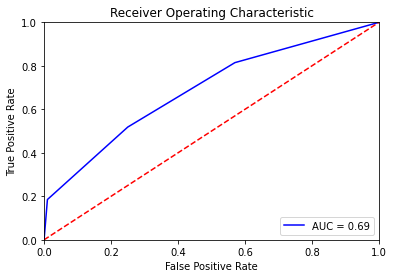

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {round(roc_auc, 2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=4)
#train model with cv of 5
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.64227642 0.75609756 0.69918699 0.73170732 0.73770492]
cv_scores mean:0.7133946421431427


In [ ]:
score_train = []
score_test = []
N = 300
for n in range(1, N+1):
  knn_n = KNeighborsClassifier(n_neighbors=n)
  cv_scores = cross_val_score(knn_n, X_train, y_train, cv=5)
  knn_n.fit(X_train, y_train)

  #score_tr = roc_auc_score(y_train, knn_n.predict_proba(X_train)[:, 1]) #knn_n.score(X_train, y_train)

  knn_n.score(X_train, y_train)
  #score_train.append(score_tr)
  #score_ts = roc_auc_score(y_test, knn_n.predict_proba(X_test)[:, 1]) #knn_n.score(X_test, y_test)
  knn_n.score(X_test, y_test)
  #score_test.append(score_ts)

  print('Количество соседей:', n)
  print('cv_scores mean:{}'.format(np.mean(cv_scores)))
  #print('score train:', score_tr)
  #print('score test:', score_ts)

Количество соседей: 1
cv_scores mean:0.6628948420631747
Количество соседей: 2
cv_scores mean:0.690590430494469
Количество соседей: 3
cv_scores mean:0.7052379048380647
Количество соседей: 4
cv_scores mean:0.7133946421431427
Количество соседей: 5
cv_scores mean:0.7231107556977209
Количество соседей: 6
cv_scores mean:0.7296281487405037
Количество соседей: 7
cv_scores mean:0.7312674930027988
Количество соседей: 8
cv_scores mean:0.7459282953485273
Количество соседей: 9
cv_scores mean:0.7393975743036119
Количество соседей: 10
cv_scores mean:0.7442889510862322
Количество соседей: 11
cv_scores mean:0.7491803278688525
Количество соседей: 12
cv_scores mean:0.7556977209116353
Количество соседей: 13
cv_scores mean:0.75077968812475
Количество соседей: 14
cv_scores mean:0.7556977209116353
Количество соседей: 15
cv_scores mean:0.7491803278688525
Количество соседей: 16
cv_scores mean:0.7573104091696654
Количество соседей: 17
cv_scores mean:0.752472344395575
Количество соседей: 18
cv_scores mean:0.7524

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, N+1), score_train, label='train')
plt.plot(range(1, N+1),score_test, label='test')
plt.legend()
plt.show()

In [ ]:
np.argmax(score_test) + 1

15

In [ ]:
# Create KNN classifier
knn_best = KNeighborsClassifier(n_neighbors = 15)
# Fit the classifier to the data
knn_best.fit(X_train,y_train)

#check accuracy of our model on the test data
print(knn_best.score(X_train, y_train))
print(knn_best.score(X_test, y_test))

print(roc_auc_score(y_train, knn_best.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, knn_best.predict_proba(X_test)[:, 1]))

0.7882736156351792
0.7402597402597403


NameError: ignored

In [ ]:
# a = [0, 1, 2, 3, 4]
# b = [1, 2, 3]

# (a=0, b=1), (a=0, b=2), (a=0, b=3), (a=1, b=1), (a=1, b=2)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, n_jobs=-1)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 24}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7605757696921231

In [ ]:
# Create KNN classifier
knn_best = KNeighborsClassifier(n_neighbors = 24)
# Fit the classifier to the data
knn_best.fit(X_train,y_train)

#check accuracy of our model on the test data
print(knn_best.score(X_train, y_train))
print(knn_best.score(X_test, y_test))

0.7638436482084691
0.7337662337662337


In [ ]:
print(roc_auc_score(y_train, knn_best.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, knn_best.predict_proba(X_test)[:, 1]))

0.8270677570093459
0.7772222222222223


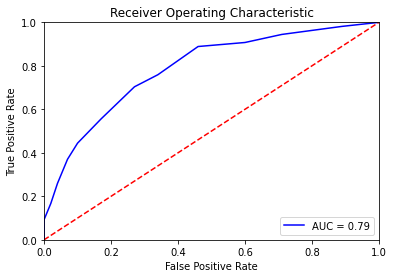

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = knn_best.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()